In [6]:
# Importazione delle librerie necessarie
import os
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
from pydub import AudioSegment
from tqdm import tqdm  # Importa la libreria tqdm per la progress bar

In [7]:
# Definizione delle directory di input e output
input_dir = 'dataset_5'
output_dir = 'NuovoDataset'

# Creare la directory di output se non esiste
os.makedirs(output_dir, exist_ok=True)

# Definizione della lunghezza desiderata in secondi e in campioni
desired_length_sec = 4  # Durata desiderata in secondi
sampling_rate = 192000  # Frequenza di campionamento (modifica se necessario)
desired_length_samples = int(desired_length_sec * sampling_rate)

In [8]:
# Lista per memorizzare i percorsi dei file audio
audio_files = []

# Scorrere ricorsivamente le cartelle nel dataset
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith('.wav') or file.endswith('.mp3'):
            audio_files.append(os.path.join(root, file))

# Visualizzare il numero di file audio trovati
print(f"Numero di file audio trovati: {len(audio_files)}")

Numero di file audio trovati: 1950


In [9]:
# Funzione per tagliare e generare gli spettrogrammi
def preprocess_audio(file, output_dir, desired_length_samples, sampling_rate):
    # Controlla tensioned del file
    if file.endswith('.mp3'):
        audio = AudioSegment.from_mp3(file)
        # Converti in formato compatibile con librosa
        y = np.array(audio.get_array_of_samples(), dtype=np.float32)
        sr = audio.frame_rate
        if audio.channels == 2:
            y = librosa.to_mono(y.reshape((-1, 2)).T)
    else:  # file.endswith('.wav')
        y, sr = librosa.load(file, sr=sampling_rate, mono=True)
    
    y_trimmed = librosa.util.fix_length(y, size=desired_length_samples, axis=-1)
    
    # Creare lo spettrogramma utilizzando STFT
    D = np.abs(librosa.stft(y_trimmed))  # Magnitude of the STFT
    D_db = librosa.amplitude_to_db(D, ref=np.max)
    
    # Creare la struttura delle directory di output mantenendo la stessa gerarchia
    relative_path = os.path.relpath(file, input_dir)
    spectrogram_output_file = os.path.splitext(os.path.join(output_dir, relative_path))[0] + '.png'
    os.makedirs(os.path.dirname(spectrogram_output_file), exist_ok=True)
    
    # Salva lo spettrogramma come immagine
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (STFT)')
    plt.tight_layout()
    plt.savefig(spectrogram_output_file, bbox_inches='tight', pad_inches=0.1)
    plt.close()

Processing audio files:   5%|▍         | 90/1950 [03:38<1:15:23,  2.43s/it]


KeyboardInterrupt: 

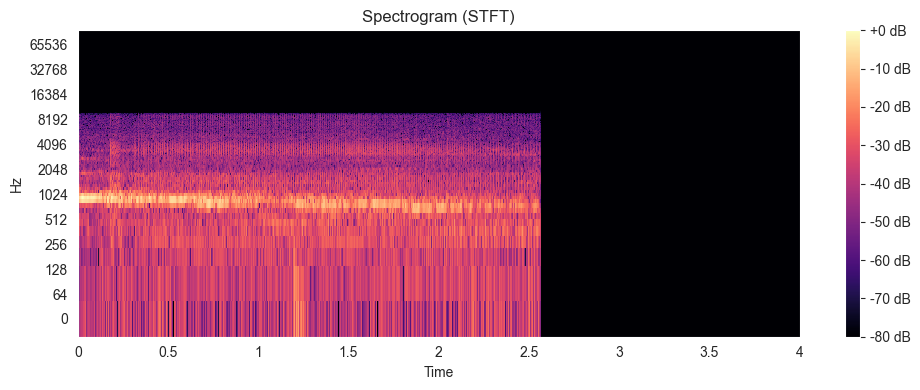

In [10]:
# Preprocessamento di ciascun file audio con progress bar
with tqdm(total=len(audio_files), desc='Processing audio files') as progress_bar:
    for file in audio_files:
        preprocess_audio(file, output_dir, desired_length_samples, sampling_rate)
        progress_bar.update(1)

print("Tutti gli spettrogrammi sono stati generati e salvati come immagini.")